In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
housing=pd.read_csv('housing.csv')


In [82]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [83]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [84]:
housing["rooms_per_household"]=housing["total_bedrooms"]/housing["households"]
housing["bedrooms_per_rooms"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [85]:
correlation=housing.corr()
correlation["median_house_value"]

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049686
population                 -0.024650
households                  0.065843
median_income               0.688075
median_house_value          1.000000
rooms_per_household        -0.046739
bedrooms_per_rooms         -0.255880
population_per_household   -0.023737
Name: median_house_value, dtype: float64

In [86]:
housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household         207
bedrooms_per_rooms          207
population_per_household      0
dtype: int64

In [87]:
men=housing["total_bedrooms"].mean()
housing["total_bedrooms"].fillna(men,inplace=True)
men2=housing["rooms_per_household"].mean()
housing["rooms_per_household"].fillna(men2,inplace=True)
men3=housing["bedrooms_per_rooms"].mean()
housing["bedrooms_per_rooms"].fillna(men3,inplace=True)

In [88]:
housing.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_rooms          0
population_per_household    0
dtype: int64

In [89]:
y=housing["median_house_value"].values
X=housing.drop(columns="median_house_value",axis=1)
X=pd.get_dummies(X, prefix=['ocean_proximity'])
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_rooms,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1.023810,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.971880,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1.073446,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1.073059,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1.081081,0.172096,2.181467,0,0,0,1,0


In [90]:

from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X.values, y,test_size = .33, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13828, 16), (6812, 16), (13828,), (6812,))

In [91]:
## importing necessary models.
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

C:\Users\hp\Anaconda3\envs\tf_gpu\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [92]:
mean_squared_error(y_test,y_pred)
r2_score(y_test,y_pred)

0.6505655075136352

In [93]:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split

lr=LinearRegression()
scores=cross_val_score(lr,X,y,n_jobs=2,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7552029990252491


In [94]:
ridge=Ridge(alpha=0.1,random_state=42)
ridge.fit(X_train, y_train)
## Predict test data. 
y_pred = ridge.predict(X_test)
print(r2_score(y_pred,y_test))
scores=cross_val_score(ridge,X,y,n_jobs=2,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

0.46683810853612784
R2:  0.7551883838479203


In [95]:
lasso=Lasso(alpha=0.1,random_state=42)
scores=cross_val_score(lasso,X,y,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7551903102746259


In [96]:
els=ElasticNet(alpha=0.1,random_state=42)
scores=cross_val_score(els,X,y,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7595094912886187


In [97]:
from sklearn.svm import SVR
sc=SVR(gamma='auto')
sc.fit(X_train,y_train)
y_pred=sc.predict(X_test)
print(r2_score(y_pred,y_test))

-851038158604553.2


In [98]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
r2_score(y_pred,y_test)

C:\Users\hp\Anaconda3\envs\tf_gpu\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


0.6360077172391386

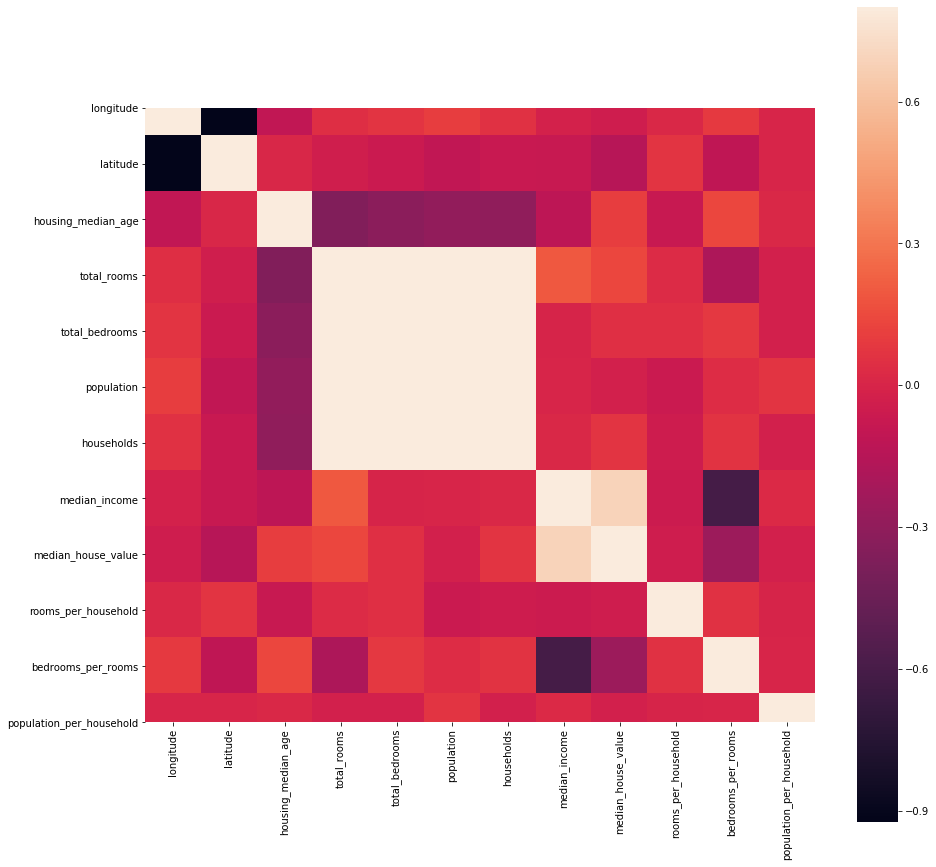

In [99]:

import seaborn as sb
C_mat = housing.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [100]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(512, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               8704      
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_33 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_34 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 1025      
Total params: 2,634,241
Trainable params: 2,634,241
Non-trainable params: 0
_________________________________________________________________


In [276]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [278]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint,learning_rate_reduction]
NN_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 11062 samples, validate on 2766 samples
Epoch 1/50
11062/11062 [==============================] - 25s 2ms/step - loss: 38830.6666 - mean_absolute_error: 38830.6875 - val_loss: 40649.2301 - val_mean_absolute_error: 40649.2266

Epoch 00001: val_loss improved from inf to 40649.23005, saving model to Weights-001--40649.23005.hdf5
Epoch 2/50
   64/11062 [..............................] - ETA: 25s - loss: 33782.1670 - mean_absolute_error: 33782.1680

C:\Users\hp\Anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_mean_absolute_error,loss,mean_absolute_error,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


11062/11062 [==============================] - 25s 2ms/step - loss: 39147.0819 - mean_absolute_error: 39147.0781 - val_loss: 41878.6883 - val_mean_absolute_error: 41878.6914

Epoch 00002: val_loss did not improve from 40649.23005
Epoch 3/50
11062/11062 [==============================] - 25s 2ms/step - loss: 38681.9080 - mean_absolute_error: 38681.9180 - val_loss: 42062.7401 - val_mean_absolute_error: 42062.7422

Epoch 00003: val_loss did not improve from 40649.23005
Epoch 4/50
11062/11062 [==============================] - 24s 2ms/step - loss: 38810.7761 - mean_absolute_error: 38810.7852 - val_loss: 41281.0862 - val_mean_absolute_error: 41281.0859

Epoch 00004: val_loss did not improve from 40649.23005
Epoch 5/50
11062/11062 [==============================] - 23s 2ms/step - loss: 38762.1068 - mean_absolute_error: 38762.0977 - val_loss: 45301.5288 - val_mean_absolute_error: 45301.5195

Epoch 00005: val_loss did not improve from 40649.23005
Epoch 6/50
11062/11062 [=======================

11062/11062 [==============================] - 23s 2ms/step - loss: 37804.6284 - mean_absolute_error: 37804.6367 - val_loss: 43676.4214 - val_mean_absolute_error: 43676.4258

Epoch 00036: val_loss did not improve from 40649.23005
Epoch 37/50
11062/11062 [==============================] - 22s 2ms/step - loss: 38391.3038 - mean_absolute_error: 38391.3008 - val_loss: 41671.7242 - val_mean_absolute_error: 41671.7266

Epoch 00037: val_loss did not improve from 40649.23005
Epoch 38/50
11062/11062 [==============================] - 22s 2ms/step - loss: 37993.8522 - mean_absolute_error: 37993.8398 - val_loss: 43300.1239 - val_mean_absolute_error: 43300.1289

Epoch 00038: val_loss did not improve from 40649.23005
Epoch 39/50
11062/11062 [==============================] - 22s 2ms/step - loss: 38325.2325 - mean_absolute_error: 38325.2305 - val_loss: 43258.6518 - val_mean_absolute_error: 43258.6484

Epoch 00039: val_loss did not improve from 40649.23005
Epoch 40/50
11062/11062 [===================

In [102]:
wights_file = 'Weights-001--40649.23005.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
y_pred=NN_model.predict(X_test)
r2_score(y_test,y_pred)

0.7201761690505505

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
housing=pd.read_csv('final.csv')
print(len(housing))
print(housing.shape)
print(len(housing.columns))
print(housing)
print(housing.columns)

20640
(20640, 17)
17
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households 

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
housing=pd.read_csv('housing.csv')
housing["rooms_per_household"]=housing["total_bedrooms"]/housing["households"]
housing["bedrooms_per_rooms"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
men=housing["total_bedrooms"].mean()
housing["total_bedrooms"].fillna(men,inplace=True)
men2=housing["rooms_per_household"].mean()
housing["rooms_per_household"].fillna(men2,inplace=True)
men3=housing["bedrooms_per_rooms"].mean()
housing["bedrooms_per_rooms"].fillna(men3,inplace=True)
df=housing.copy()
df.head()
df['ocean_proximity'] = pd.Categorical(df['ocean_proximity'])
df['ocean_proximity'] = df.ocean_proximity.cat.codes
df.head()
target = df.pop('median_house_value')
dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))
for feat, targ in dataset.take(5):
    print('Features: {}, Target: {}'.format(feat, targ))

train_dataset = dataset.shuffle(len(df)).batch(1)
inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in df.keys()}
x = tf.stack(list(inputs.values()), axis=-1)

x = tf.keras.layers.Dense(10, activation='relu')(x)
output = tf.keras.layers.Dense(1)(x)

model_func = tf.keras.Model(inputs=inputs, outputs=output)

model_func.compile(optimizer='adam',
                   loss='mean_absolute_error',
                   metrics=['mean_absolute_error'])
dict_slices = tf.data.Dataset.from_tensor_slices((df.to_dict('list'), target.values)).batch(16)
model_func.fit(dict_slices, epochs=15)



Features: [-1.22230000e+02  3.78800000e+01  4.10000000e+01  8.80000000e+02
  1.29000000e+02  3.22000000e+02  1.26000000e+02  8.32520000e+00
  3.00000000e+00  1.02380952e+00  1.46590909e-01  2.55555556e+00], Target: 452600.0
Features: [-1.22220000e+02  3.78600000e+01  2.10000000e+01  7.09900000e+03
  1.10600000e+03  2.40100000e+03  1.13800000e+03  8.30140000e+00
  3.00000000e+00  9.71880492e-01  1.55796591e-01  2.10984183e+00], Target: 358500.0
Features: [-1.22240000e+02  3.78500000e+01  5.20000000e+01  1.46700000e+03
  1.90000000e+02  4.96000000e+02  1.77000000e+02  7.25740000e+00
  3.00000000e+00  1.07344633e+00  1.29516019e-01  2.80225989e+00], Target: 352100.0
Features: [-1.22250000e+02  3.78500000e+01  5.20000000e+01  1.27400000e+03
  2.35000000e+02  5.58000000e+02  2.19000000e+02  5.64310000e+00
  3.00000000e+00  1.07305936e+00  1.84458399e-01  2.54794521e+00], Target: 341300.0
Features: [-1.22250000e+02  3.78500000e+01  5.20000000e+01  1.62700000e+03
  2.80000000e+02  5.65000000e

In [ ]:

train_dataset = dataset.shuffle(len(df)).batch(1)
inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in df.keys()}
x = tf.stack(list(inputs.values()), axis=-1)

out1= tf.keras.layers.Dense(512,kernel_initializer='normal', activation='relu')(x)
out2 = tf.keras.layers.Dense(1024,kernel_initializer='normal', activation='relu')(out1)
out3 = tf.keras.layers.Dense(1024,kernel_initializer='normal', activation='relu')(out2)
out4 = tf.keras.layers.Dense(1024,kernel_initializer='normal', activation='relu')(out3)

output = tf.keras.layers.Dense(1,kernel_initializer='normal',activation='linear')(out4)

model_func = tf.keras.Model(inputs=inputs, outputs=output)

model_func.compile(optimizer='adam',
                   loss='mean_absolute_error',
                   metrics=['mean_absolute_error'])
dict_slices = tf.data.Dataset.from_tensor_slices((df.to_dict('list'), target.values)).batch(16)

callbacks_list = [learning_rate_reduction]
model_func.fit(dict_slices, epochs=80)